<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson11/dz11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 60 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 50 баллов





-----

In [214]:
import scipy.stats as sps
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta

from statsmodels.stats.proportion import proportion_confint

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [215]:
# Bot check

# HW_ID: phds_hw8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

---
### Задача 1
#### **Профиль физика**

Рассмотрим [данные](https://drive.google.com/file/d/1qGNN9pcSg6safgxqvWeimQEPtlyggOYc/view?usp=share_link) из первой задачи прошлого домашнего задания, нам понадобится только поперечный импульс `pT` мюона $\pi^+$ (`id = 211`). В предположении, что дисперсия значений не зависит от типа мюона, посчитайте с помощью формулы `MDE`, сколько мюонов каждого из двух исследуемых типов надо измерить, чтобы задетектировать разницу в средних импульсах равной 0.02? Можно ли снизить это число и из каких соображений? Сделайте соотвветсвующие вычисления

Выгрузим данные.

In [216]:
!gdown 1qGNN9pcSg6safgxqvWeimQEPtlyggOYc

Downloading...
From: https://drive.google.com/uc?id=1qGNN9pcSg6safgxqvWeimQEPtlyggOYc
To: /content/pi.csv
100% 1.97M/1.97M [00:00<00:00, 13.9MB/s]


In [217]:
df = pd.read_csv('pi.csv')
df.head()

,pT,xF,E,mP,eta,type
0,0.448320,0.099981,0.982772,9.059752,4.096336,0
1,0.789911,-0.016602,0.814856,3.563486,2.518421,0
2,0.499975,-0.124139,1.191020,2.074630,1.471015,1
3,0.025370,0.004610,0.147337,4.236236,4.676719,0
4,0.097505,-0.010402,0.192495,2.962972,2.724043,0


Выделим нужные нам.

In [218]:
pT_plus = df['pT']

Посмотрим на гистограмму.

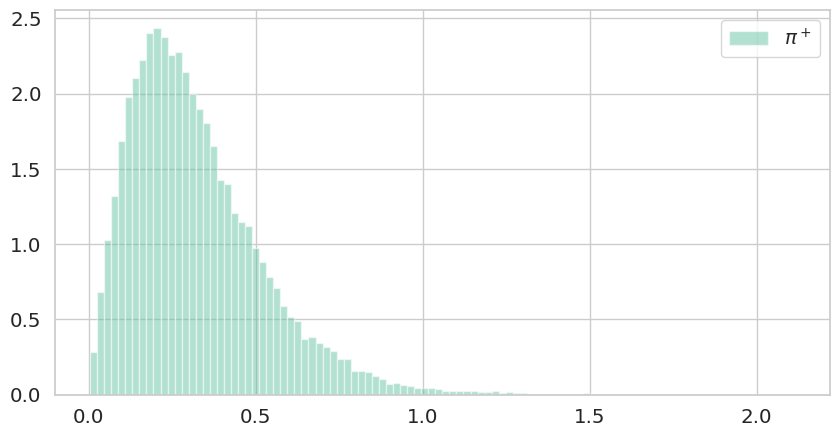

In [219]:
plt.figure(figsize=(10, 5))

plt.hist(pT_plus, alpha=0.5, bins=100, density=True, label='$\pi^+$')

plt.legend()
plt.show()

По формуле для `MDE` вычислите необходимый размер выборки.

In [220]:
alpha = 0.05  # уровень значимости
beta = 0.8  # мощности
eps = 0.02  # размер эффекта

# сумма квантилей
q = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)

In [221]:
var_0 = pT_plus.var()
n_0 = q**2 * var_0/ eps**2

n_0, var_0

(639.8013936429767, 0.04139396496513863)

In [222]:
pT_plus.describe(np.linspace(0.01,0.99,9))

count    20000.000000
mean         0.324110
std          0.203455
min          0.003435
1%           0.031838
13.2%        0.122675
25.5%        0.179397
37.8%        0.229964
50%          0.284422
62.3%        0.346122
74.5%        0.424607
86.8%        0.541018
99%          0.976897
max          2.113151
Name: pT, dtype: float64

Обрежем выбросы, чтобы уменьшить дисперсию

**Внимание! Удалять выбросы можно только на основе данных до эксперимента. Например, не рассматривать в эксперименте пользователя, на котором произошел выброс. Удаление пользователей по выбросам по экспериментальным данных может привести к большим ошибкам.**

In [223]:
pT_plus = pT_plus[pT_plus < 0.97]

In [224]:
var_0 = pT_plus.var()
n_0 = q**2 * var_0 / eps**2

n_0, var_0

(528.202596081394, 0.03417372949470209)

Посмотрим на зависимость размера выборки в исследовании от размера эффекта. Какой минимальный эффект можно зафиксировать с нашей выборкой?

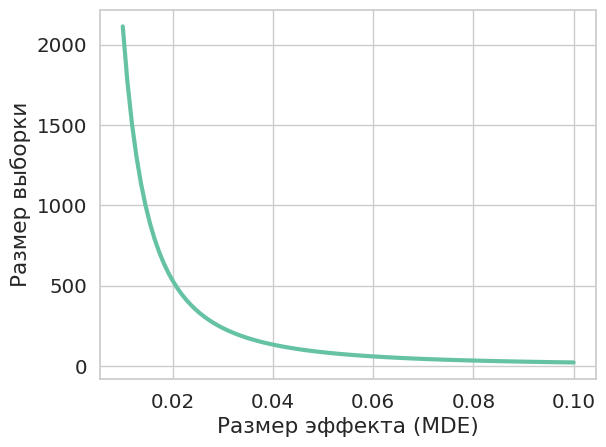

In [225]:
eps = np.linspace(0.01, 0.1, 100)
n = q**2 * var_0 / eps**2

plt.plot(eps, n, lw=3)
plt.xlabel('Размер эффекта (MDE)')
plt.ylabel('Размер выборки');

In [226]:
(q**2 * var_0 / len(pT_plus))**0.5# минимальный эффект, который можно задетектировать с данной выборкой

0.003267190435483464

### Задача 1
#### **Профиль биология**

Рассмотрим данные [данные по медицинским страховкам](https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv) из задачи 2 задания по AВ тестам. С помощью формулы для `MDE` оцените количество клиентов страховых компаний, на которых нужно провести AB-тест новых рекомендаций по употреблению витаминов, чтобы задетектировать снижение средней стоимости страховки на 600 долларов. Считайте, что компании не расширяют свою клиентскую базу и данные представляют всех клиентов, которые могут участвовать в тесте

In [227]:
!pip install opendatasets

In [228]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 92.3k/92.3k [00:00<00:00, 36.6MB/s]

In [229]:
DATA_PATH ='medical-insurance-cost/Train_Data.csv'# pd.read_csv()

In [230]:
data = pd.read_csv(DATA_PATH)['charges'].values # before_exp

In [231]:
data.shape

(3630,)

In [294]:
alpha = 0.05  # уровень значимости
beta = 0.8  # мощности
eps = 600  # размер эффекта

# сумма квантилей
q = sps.norm.ppf(1-alpha/2) +  sps.norm.ppf(beta)

var_0 = data.var()

n_0 = q**2 * var_0 / eps**2  # размер выборки

n_0, var_0

(strata    0.000004
 sample    0.000196
 dtype: float64,
 strata    0.205139
 sample    8.988623
 dtype: float64)

Достаточно ли у вас клиентов для исследования?

**Ответ:** Достаточно. 2_000 < 3_000


Посмотрим на распределение суммы страховки

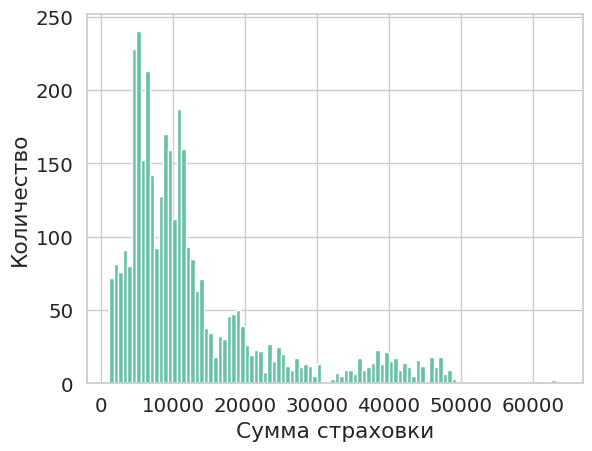

In [233]:
plt.hist(data, bins=100)
plt.xlabel('Сумма страховки')
plt.ylabel('Количество');

Видим, что есть выбросы, завышающие нам дисперсию.

In [234]:
data_1 = data[data < 50_000]

In [235]:
data_1.shape

(3621,)

**Внимание! Удалять выбросы можно только на основе данных до эксперимента. Например, не рассматривать в эксперименте клиента, на котором произошел выброс. Удаление клиентов по выбросам по экспериментальным данных может привести к большим ошибкам.**

Посчитаем, сколько нужно пользователей

In [236]:
var_1 = data_1.var()
n_1 = q*2 * var_1 / eps**2

n_1, var_1

(1528.1795939703613, 110627431.3413543)

С помощью удаления выбросов мы сократили требуемое количество клиентов пропорционально уменьшению дисперсии.

In [237]:
n_0 / n_1, var_0 / var_1

(1.2974144827555045, 1.0435773981498333)

Как зависит требуемый размер выборки в исследовании от размера эффекта? Постройте график размера выборки от `MDE` для ожидаемой в нашем исследовании дисперсии и сделайте выводы.

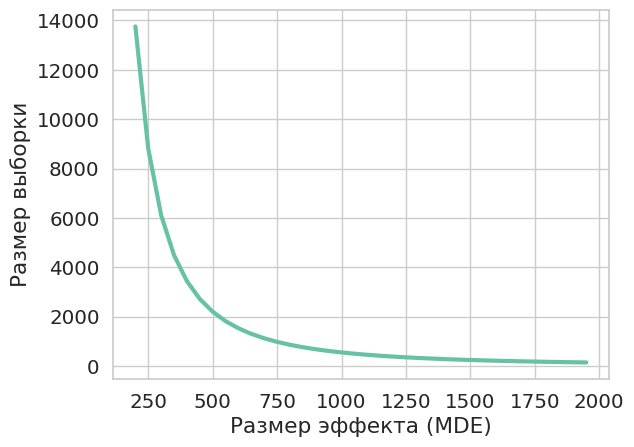

In [238]:
eps = np.arange(200, 2000, 50)
n = q*2 * var_1 / eps**2

plt.plot(eps, n, lw=3)
plt.xlabel('Размер эффекта (MDE)')
plt.ylabel('Размер выборки');

**Вывод:** квадратично

---
### Задача 2

Выведите формулу `MDE` для относительного t-теста.

### **Решение**

Подход к поиску дисперсии отношения двух случайных величин описан в https://www.stat.cmu.edu/~hseltman/files/ratio.pdf

$$
    \mathbf{D}\frac{R}{S} \approx \frac{\mu_R^2}{\mu_s^2} \left[ \frac{\sigma_R^2}{\mu_R^2} - 2 \frac{Cov(R,S)}{\mu_R \mu_S}+ \frac{\sigma^2_S}{\mu_S^2} \right]
$$

Дисперсия отношения разности к значению запишется как:
$$
    \mathbf{D}\frac{\bar{E}-\bar{C}}{\bar{C}} \approx \frac{(\mathbf{E}\bar{T}- \mathbf{E}\bar{C})^2}{\mathbf{E}\bar{C}^2} \left[ \frac{\mathbf{D}[\bar{T}-\bar{C}]}{\mathbf{E}\bar{C}^2} - 2 \frac{Cov(T-C,C)}{\mathbf{E}[\bar{T}-\bar{C}]\mathbf{E}\bar{C}}+ \frac{\mathbf{D}\bar{C}}{\mathbf{E}\bar{C}^2} \right]
    \tag{1}
$$

Тогда MDE:
$$
    MDE = (Z_{1-\alpha} + Z_{\beta}) \sqrt{ \mathbf{D}\frac{\bar{E}-\bar{C}}{\bar{C}}}
$$

Формула отличается от обычного теста отсутствием деления на корень размера выборки. Это связанро с тем, что оценивается дисперсия **усредненной** случайной величины.


---
### Задача 3
#### **Профиль физика**


Квантовые компьтеры состоят из кубитов, каждый из которых по-отдельности можно представить в виде единичного вектора на сфере. Считывание состояние кубита — это получение проекции этого вектора на ось $z$, причём считав состояние один раз мы получаем детерменированное значение: 0 или 1. Таким образом для получения значения проекции с определённой точностью мы усредняем некоторое количество считываний.

В данной задаче мы будем генерировать выборку из распределения Бернулли, симулируя проекции, получаемые от кубита. Наша задача — исследовать минимальный размер выборки для разных значений разделения состояний.


Выберите или оцените каким-нибудь способом:

1. Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

2. Размеры A и B групп;

3. Желаемый минимальный детектируемый эффект;

4. Мощность критерия.

Обоснуйте свой выбор в каждом из пунктов.


> Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

**Ответ:** двусторонний не связанный t-test. Для эксперимента будет полезно отклонение в любую из сторон. Замеры коллапсируют волновую функцию, связность между экспериментами физически невозможна



> Мощность критерия

**Ответ:** 0.8. Возьмем стандартные для статистики значения

> Желаемый минимальный детектируемый эффект;

> Размер А и В групп;

Для оценки разделяющей способности возьмем характерное значение в одну сотую. Размер групп подберем исходя из детектируемого эффекта



Будем подбирать по таблице `MDE`-мощность-размер выборки

In [239]:
def get_mde(alpha, beta, sample_size, var_R, two_sided=False):
    '''Расчитывает MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param sample_size: размер выборок
    :param var_R: оценка дисперсии выборок
    :param two_sided: двусторонний ли критерий
    :returns: теоретический MDE
    '''

    quantile = sps.norm.ppf(1-alpha/2) + sps.norm.ppf(beta)
    return quantile * (var_R / sample_size)**0.5


def get_sample_size(alpha, beta, mde, var_R, two_sided=False):
    '''Расчитывает размер выборки для детектирование MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_R: дисперсии выборок
    :returns: необходимый размер выборки
    '''

    quantile = sps.norm.ppf(1-alpha/2) + sps.norm.ppf(beta)
    return  np.ceil(( quantile ** 2) * (var_R) / (mde * mde)).astype(int)

Создадим датасеты для разных значений проекций. Задайте размер выборок size=2000.

In [240]:
ber_parameters = np.linspace(0.3, 0.8, 6)
data = np.array([np.random.binomial(1,p,size=2000) for p in ber_parameters]) # возьмём центральные значения проекций

In [241]:
data.shape

(6, 2000)

Вычислим значения таблицы.

In [242]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(1, -1,1)  # абсолютный MDE
beta_grid = np.arange(0.6, 1, 0.05).reshape(1,1,-1)   # мощность
alpha = 0.05
var = 2*data.var(axis=1).reshape(-1,1,1) # дисперсия

sample_sizes = get_sample_size(
    alpha = alpha,
    beta = beta_grid,
    mde = mde_grid,
    var_R=var
)
sample_sizes.shape

(6, 9, 8)

Посмотрим для крайних и центрального значений, как выглядит таблица.

In [243]:
pd.DataFrame(sample_sizes[0], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,19944,22394,25128,28256,31955,36553,42778,52904
0.02,4986,5599,6282,7064,7989,9139,10695,13226
0.03,2216,2489,2792,3140,3551,4062,4754,5879
0.04,1247,1400,1571,1766,1998,2285,2674,3307
0.05,798,896,1006,1131,1279,1463,1712,2117
0.06,554,623,698,785,888,1016,1189,1470
0.07,408,458,513,577,653,746,874,1080
0.08,312,350,393,442,500,572,669,827
0.09,247,277,311,349,395,452,529,654


In [244]:
pd.DataFrame(sample_sizes[2], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,24491,27498,30856,34697,39239,44886,52530,64965
0.02,6123,6875,7714,8675,9810,11222,13133,16242
0.03,2722,3056,3429,3856,4360,4988,5837,7219
0.04,1531,1719,1929,2169,2453,2806,3284,4061
0.05,980,1100,1235,1388,1570,1796,2102,2599
0.06,681,764,858,964,1090,1247,1460,1805
0.07,500,562,630,709,801,917,1073,1326
0.08,383,430,483,543,614,702,821,1016
0.09,303,340,381,429,485,555,649,803


In [245]:
print(ber_parameters[5])
pd.DataFrame(sample_sizes[5], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

0.8


,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,16283,18283,20515,23069,26089,29843,34925,43192
0.02,4071,4571,5129,5768,6523,7461,8732,10798
0.03,1810,2032,2280,2564,2899,3316,3881,4800
0.04,1018,1143,1283,1442,1631,1866,2183,2700
0.05,652,732,821,923,1044,1194,1397,1728
0.06,453,508,570,641,725,829,971,1200
0.07,333,374,419,471,533,610,713,882
0.08,255,286,321,361,408,467,546,675
0.09,202,226,254,285,323,369,432,534


Какой размер детектируемого эффекта мы возьмём и какой для него размер выборок?

**Ответ:** MDE = 0.01. Размер выборки будет зависеть от параметров распределения бернулли. Зафиксируем 0.8 Тогда ориентируемся на 10_000



Для выбранного критерия проведите АА-тест по сгенерированным данным.

In [246]:
new_data = sps.bernoulli.rvs(0.8, size=100_000)

In [247]:
sample_size = 25_000
mde = 0.01
alpha = 0.05

In [248]:
def absolute_ttest(x, y, alpha=0.05):
    '''
    Абсолютный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = x_mean - y_mean
    var = np.var(x) + np.var(y)
    std = np.sqrt(var)

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = -q*std / np.sqrt(n) + stat
    right_bound = q*std / np.sqrt(n) + stat

    return stat, left_bound, right_bound, pvalue

In [249]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(new_data, (2, sample_size), replace=False)

    p_val = absolute_ttest(sample1,sample2)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:12<00:00, 165.70it/s]


In [250]:
def draw_interval(
    real_alpha, left_alpha, right_alpha,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

Реальный уровень значимости: 0.06


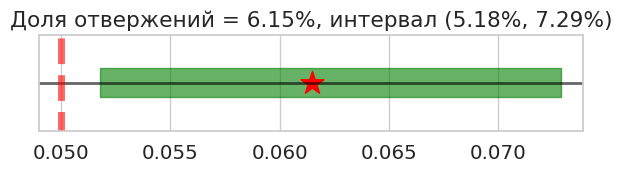

In [251]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите на гистограмму pvalue.

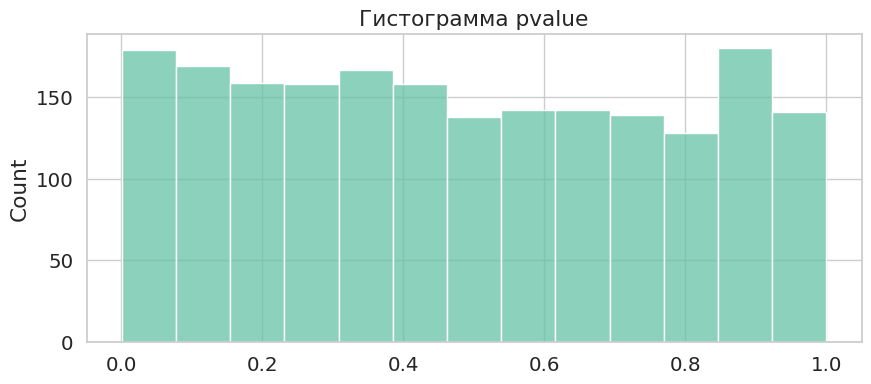

In [252]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))
plt.title('Гистограмма pvalue')
sns.histplot(p_vals)
plt.show()

Какие выводы о валидности выбранного критерия вы можете сделать?

**Ответ:**


In [253]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(new_data, (2, sample_size), replace=False)

    sample2 = sample2 + mde
    #sample2 += sps.norm.rvs(size=len(sample2), scale=0.01)

    pvals.append(absolute_ttest(sample1,sample2)[3])

pvals = np.array(pvals)

100%|██████████| 2000/2000 [00:27<00:00, 72.44it/s]


In [254]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.8


$$
P( \left|\frac{\bar{X}-\bar{Y}}{\sqrt{\frac{\sigma^2_1+\sigma^2_2}{n}}}\right|>q_{1-\alpha/2}) = \beta
$$

In [255]:
# синтетический AB-тест
pvals = []

mde = 0.01
beta = 0.8
alpha = 0.05


quantile = sps.norm.ppf(1-alpha/2) + sps.norm.ppf(beta)

var_R = 0.8*(1-0.8) + (0.8+mde)*(1-0.8-mde)
sample_size =  np.ceil(( quantile ** 2) * (var_R) / (mde * mde)).astype(int)


for _ in tqdm(range(2000)):
    sample1 = sps.bernoulli.rvs(0.8, size=sample_size)
    sample2 = sps.bernoulli.rvs(0.8 + mde, size=sample_size)

    stat = sample1.mean() - sample2.mean()
    var = 0.8*(1-0.8) + (0.8+mde)*(1-0.8-mde)
    std = np.sqrt(var)

    z_stat = np.sqrt(sample_size) * stat / std
    pvals.append(2*sps.norm.sf(np.abs(z_stat)))

pvals = np.array(pvals)

100%|██████████| 2000/2000 [00:10<00:00, 189.03it/s]


In [256]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.806


**Вывод** реальная мощность критерия оказывается слабее теоретической. Даже в случае точно заданной дисперсии выборки.

Это связано с ошибкой отвержения нулевой гипотезы alpha.

Полезно закладывать амортизацию порядка 1.2 для обеспечения необходимой мощности






### Задача 3
#### **Профиль биология**

В одной фармацевтической компании собираются проводить II фазу клинических испытаний нового лекарства, ослабляющего симптомы диабета. Перед командой аналитики стоит задача о корректном проведении AB-тестирования. У вас имеются исторические [данные по пациентам](https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset?select=diabetes.csv), страдающим диабетом. С помощью них проведите дизайн эксперимента.


Выберите или оцените каким-нибудь способом:

1. Таргет клинических испытаний (первичную контрольную точку): уровень глюкозы, инсулина, толщину кожи и тд.;

2. Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

3. Размеры A и B групп;

4. Желаемый минимальный детектируемый эффект;

5. Мощность критерия.

Обоснуйте свой выбор в каждом из пунктов.

Все ли полученные показатели вас устраивают? Если нет, то какие могут быть способы их улучшить?

*Примечание.* Если кажется, что информации недостаточно, сделайте свои дополнительные предположения, коррелирующие с реальностью, и работайте с ними.


Для выбранного критерия проведите АА-тест по историческим данным. Если исторических данных оказалось недостаточно для вашей модели, придумайте способ решения проблемы.

In [257]:
od.download('https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset?select=diabetes.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 8.91k/8.91k [00:00<00:00, 4.96MB/s]

In [317]:
DATA_PATH = '/content/diabetes-disease-updated-dataset/diabetes.csv'

In [318]:
data = pd.read_csv(DATA_PATH)
data = data[data['Outcome']==1]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


Выберите, обоснуйте и визуализируйте:

> Таргет клинических испытаний (первичную контрольную точку): уровень глюкозы, инсулина, толщину кожи и тд.;

**Ответ:**

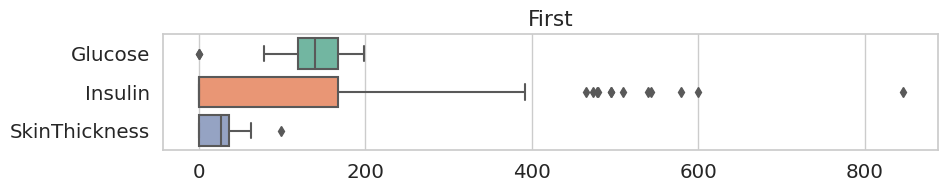

In [319]:
plt.figure(figsize=(10, 1.5))
sns.boxplot(data[['Glucose','Insulin','SkinThickness']], orient='h')
plt.title('First')
plt.show()

> Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

**Ответ:** двусторонний t-test, независимые выборки

> Мощность критерия

**Ответ:** 0.8

> Желаемый минимальный детектируемый эффект;

> Размер А и В групп;

Будем подбирать по рассмотренной на семинаре таблице `MDE`-мощность-размер выборки

In [322]:
def get_mde(alpha, beta, sample_size, var_R, two_sided=False):
    '''Расчитывает MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param sample_size: размер выборок
    :param var_R: оценка дисперсии выборок
    :param two_sided: двусторонний ли критерий
    :returns: теоретический MDE
    '''

    quantile = sps.norm.ppf(1-alpha/2) + sps.norm.ppf(beta)
    return quantile * (var_R / sample_size)**0.5


def get_sample_size(alpha, beta, mde, var_R, two_sided=False):
    '''Расчитывает размер выборки для детектирование MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_R: дисперсии выборок
    :returns: необходимый размер выборки
    '''

    quantile = sps.norm.ppf(1-alpha/2) + sps.norm.ppf(beta)
    return (var_R * (quantile /mde) **2).astype(int)

In [334]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1)  # относительный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = 0.05
var = data['Glucose'].var() * 2 / (data['Glucose'].mean()**2)  # относительная дисперсия

sample_sizes = get_sample_size(alpha,beta_grid,mde_grid,var)
pd.DataFrame(sample_sizes, columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,5009,5624,6310,7096,8025,9180,10743,13287
0.02,1252,1406,1577,1774,2006,2295,2685,3321
0.03,556,624,701,788,891,1020,1193,1476
0.04,313,351,394,443,501,573,671,830
0.05,200,224,252,283,321,367,429,531
0.06,139,156,175,197,222,255,298,369
0.07,102,114,128,144,163,187,219,271
0.08,78,87,98,110,125,143,167,207
0.09,61,69,77,87,99,113,132,164


**Ответ:** mde 0.07 и мощность 0.7 -> 128. Размер выборки достаточен для проведения A-A теста

Для выбранного критерия проведите АА-тест по историческим данным. Если исторических данных оказалось недостаточно для вашей модели, придумайте способ решения проблемы.

In [358]:
sample_size = 128
mde = 0.07
alpha = 0.05

In [345]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_mean_var = np.var(x) / len(x)
    y_mean_var = np.var(y) / len(y)

    #print(x_mean,y_mean,x_mean_var,y_mean_var)


    # https://habr.com/ru/companies/avito/articles/571094/
    stat = (x_mean - y_mean) / y_mean
    var = (
        (x_mean_var + y_mean_var) / (y_mean)**2 +
        y_mean_var * (
            (x_mean - y_mean)**2 / y_mean** 4 +
            2 * (x_mean - y_mean) / y_mean** 3
        )
    )
    std = np.sqrt(var)


    z_stat =  stat / std # считается дисперсия среднего статистики, поэтому не делим на корень
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = - q * std
    right_bound =  q * std

    return stat, left_bound, right_bound, pvalue

In [346]:
# синтетический пример для отладки теста
p_vals = []
for i in tqdm(range(2000)):
    # 4.a. Тестирую A/B-тест.
    control,test = sps.expon(scale=10).rvs(2000),sps.expon(scale=10).rvs(2000)
    p_val = relative_ttest(control,test,alpha=alpha)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:06<00:00, 328.24it/s]


In [347]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(data['Glucose'], (2, sample_size), replace=False)

    p_val = relative_ttest(sample1,sample2,alpha=alpha)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:01<00:00, 1978.11it/s]


In [348]:
def draw_interval(
    real_alpha, left_alpha, right_alpha,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

Реальный уровень значимости: 0.05


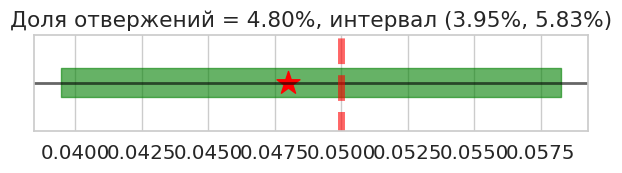

In [349]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите также на гистограмму p-value

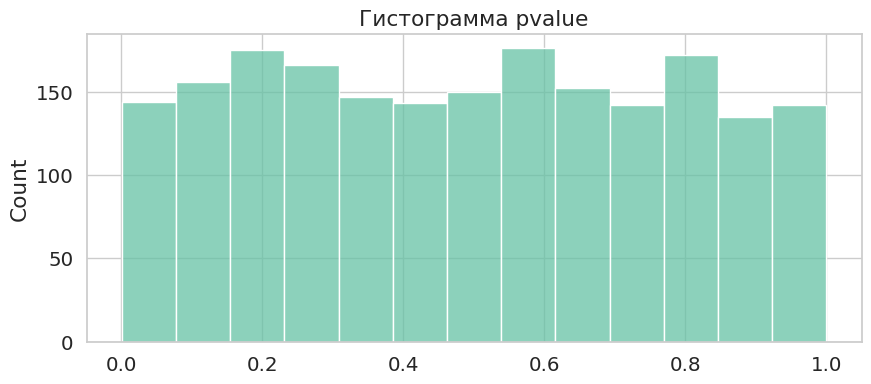

In [350]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))
plt.title('Гистограмма pvalue')
sns.histplot(p_vals)
plt.show()

Какие выводы о валидности выбранного критерия вы можете сделать?

**Ответ:** критерий валидный. p-value распределен равномерно

Проверьте также мощность критерия на выбранном `MDE`.


In [369]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(data['Glucose'], (2, sample_size), replace=False)

    sample2 = sample2 * (1+mde)
    #sample2 += sps.norm.rvs(size=len(sample2), scale=0.001)

    pvals.append(relative_ttest(sample2,sample1)[3])

pvals = np.array(pvals)

100%|██████████| 2000/2000 [00:02<00:00, 980.42it/s]


In [370]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.645


**Вывод** реальная мощность совпадает с теоретической

---

### Задача 4
#### **Профиль физика**


Рассмотрим [данные о звездах](https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv) из предыдущего домашнего задания:

Датасет содержит информацию о звездах, где `POP` - разделяет звёзды по классам. Нас будeт интересовать столбец `Dnu`.

Считайте данные.

In [272]:
od.download('https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 10.7k/10.7k [00:00<00:00, 2.69MB/s]

In [371]:
df = pd.read_csv("/content/classification-in-asteroseismology/classification_in_asteroseismology.csv")

In [372]:
feature = df['Dnu']
df

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


Получите таблицу `MDE`-мощности-размера выборки для параметра `Dnu` как в 3-м задании, но теперь проведя относительный ttest и написав его функцию.

In [373]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_mean_var = np.var(x) / len(x)
    y_mean_var = np.var(y) / len(y)

    #print(x_mean,y_mean,x_mean_var,y_mean_var)


    # https://habr.com/ru/companies/avito/articles/571094/
    stat = (x_mean - y_mean) / y_mean
    var = (
        (x_mean_var + y_mean_var) / (y_mean)**2 +
        y_mean_var * (
            (x_mean - y_mean)**2 / y_mean** 4 +
            2 * (x_mean - y_mean) / y_mean** 3
        )
    )
    std = np.sqrt(var)


    z_stat =  stat / std # считается дисперсия среднего статистики, поэтому не делим на корень
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = - q * std
    right_bound =  q * std

    return stat, left_bound, right_bound, pvalue

In [374]:
var

0.10225080580318897

In [376]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1) # относительный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = 0.05
var = feature.var() * 2 / (feature.mean()**2)  # относительная дисперсия

sample_sizes = get_sample_size(
    alpha=alpha,
    beta = beta_grid,
    mde=mde_grid,
    var_R=var
)
print(sample_sizes.shape)
pd.DataFrame(sample_sizes, columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

(9, 8)


,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,26407,29650,33271,37413,42311,48400,56642,70051
0.02,6601,7412,8317,9353,10577,12100,14160,17512
0.03,2934,3294,3696,4157,4701,5377,6293,7783
0.04,1650,1853,2079,2338,2644,3025,3540,4378
0.05,1056,1186,1330,1496,1692,1936,2265,2802
0.06,733,823,924,1039,1175,1344,1573,1945
0.07,538,605,679,763,863,987,1155,1429
0.08,412,463,519,584,661,756,885,1094
0.09,326,366,410,461,522,597,699,864


Какие значения `MDE`, достоверности и размера выборки стоит выбрать?

**Ответ:** 0.75 мощность и 0.09 эффект -> единственный доступный размер выборки для проведения теста


Далее как в 3-й задаче по физике посмотрим на реальный уровень значимости, гистограмму p_value и реальный уровень значимости.

In [377]:
sample_size = 460
mde = 0.09
alpha = 0.05

In [378]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(feature, (2, sample_size), replace=False)

    p_val = relative_ttest(sample1,sample2)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:00<00:00, 2102.88it/s]


Реальный уровень значимости: 0.05


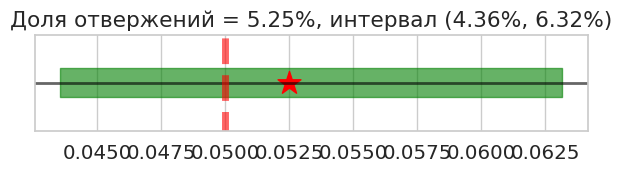

In [379]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите также на гистограмму p-value.

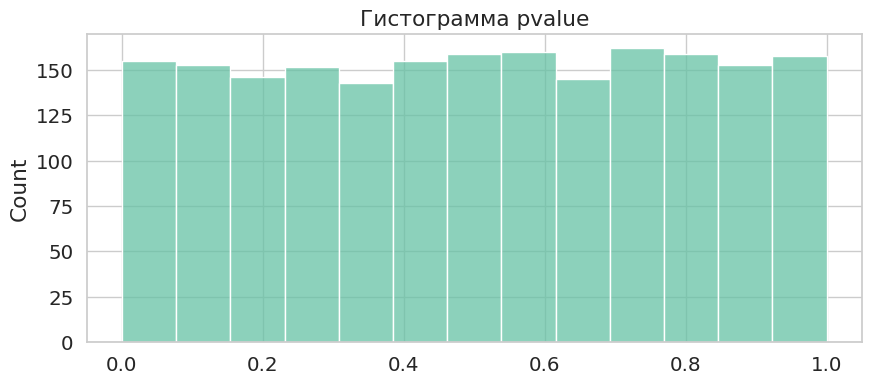

In [380]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))
plt.title('Гистограмма pvalue')
sns.histplot(p_vals)
plt.show()

Что можно сказать о валидности критерия?

**Ответ:** критерий валиден

Проверьте также мощность критерия на выбранном `MDE`.


In [381]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(feature, (2, sample_size), replace=False)

    sample2 = sample2 * 1.09
    #sample2 += sps.norm.rvs(size=len(sample2), scale=0.01)

    pvals.append(relative_ttest(sample2,sample1)[3])

pvals = np.array(pvals)

100%|██████████| 2000/2000 [00:01<00:00, 1709.56it/s]


In [382]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.69


Мощность критерия примерно совпадает с теоретической



Теперь воспользуемся стратификацией. Будем разбивать на страты по параметру `POP` выборки.

Реализуйте функции для стратифицированного семплирования и стратифицированного относительного t-test. Заранее вспомните с семинара, какое семплирование какому тесту подходит. Не забудьте о возможности пост-стратификации. Какие методы подойдут вам, учитывая количество страт и размер выборки?

**Ответ:** страты две. Подойдут любые

In [383]:
def calculate_strata_weights(data):
    '''
    Вычисляет веса страт.

    :param data: исходные данные
    :return: веса страт
    '''

    strata_weights = data.groupby(by='strata')['sample'].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights


def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return np.sum(strata_means * weights)


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data.sum()


def random_sampler(data, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.

    :param data: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''

    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[sample_size:]

def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''

    groupped = data.groupby('strata')

    # Веса страт
    strata_weights = groupped.size() / len(data)

    # Размер выборок
    strata_sample_size = (sample_size * strata_weights).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(groupped):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.

    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''

    strata_vars = data.groupby(by='strata')['sample'].var()
    return np.sum(strata_vars * strata_weights)

def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.

    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''

    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data.var()

In [384]:
def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.

    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''

    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var

    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)

    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var )

    t_stat = np.sqrt(len(x_data)) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = - q * std / np.sqrt(len(x_data))
    right_bound = q * std / np.sqrt(len(x_data))

    return stat, left_bound, right_bound, pvalue

Теперь проверим корректность применения стратификации в нашем случае.

Сначала создадим отдельный датасет для более удобной проверки. У него будет две колонки: `sample`, `strata`, которые соответствуют данным и разделением на страты у исходного датасета.

In [385]:
data = pd.DataFrame()
data['strata'] = df['POP']
data['sample'] = df['Dnu']
data = data[['strata', 'sample']]
data

,strata,sample
0,1,4.44780
1,0,6.94399
2,1,2.64571
3,1,4.24168
4,0,10.44719
...,...,...
996,0,5.51582
997,1,4.14823
998,1,3.98294
999,1,4.33893


Посмотрите на `boxplot` для двух подгрупп.

<Axes: xlabel='strata', ylabel='sample'>

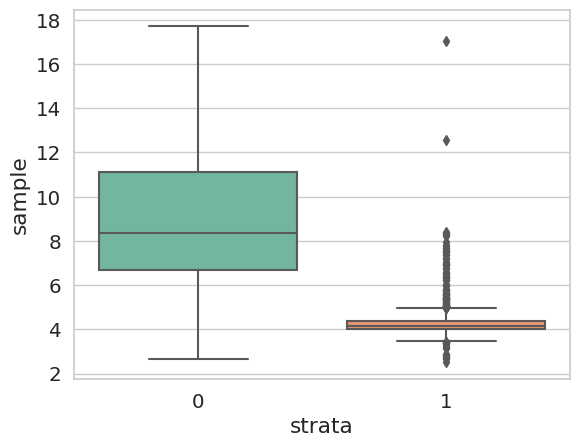

In [386]:
sns.boxplot(data, x='strata', y='sample')

In [387]:
data['strata'].sum()

713

Что вы можете сказать уже сейчас о том, повлияет ли стратификация на результаты теста?

**Ответ:** Средние значительно отличаются, это позволит существенно уменьшить дисперсию. Есть незначительный дисбаланс классов, который может привести к нестабильности теста



In [388]:
p_vals = []
strata_weights = calculate_strata_weights(data)

for i in tqdm(range(2000)):

    control_sample, test_sample = random_sampler(data,sample_size=500)

    p_vals.append(stratified_ttest(control_sample,test_sample,strata_weights,method='stratified')[3])

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:09<00:00, 216.61it/s]


Посмотрите также на реальный уровень значимости и гистограмму p-value

Реальный уровень значимости: 0.06


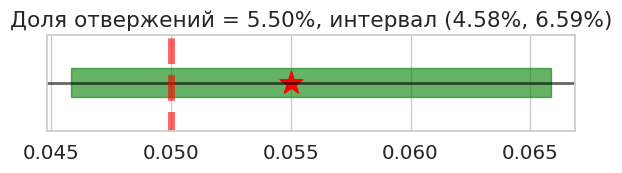

In [389]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Корректны ли выбранные методы?

**Ответ:** Да

Посмотрите на мощность критерия. Улучшилась ли мощность по сравнению с обработкой без стратификации?

In [390]:
p_vals = []
strata_weights = calculate_strata_weights(data)

for i in tqdm(range(2000)):

    control_sample, test_sample = random_sampler(data,sample_size=500)

    test_sample['sample'] *= 1.09

    p_vals.append(stratified_ttest(control_sample,test_sample,strata_weights,method='stratified')[3])

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:12<00:00, 157.01it/s]


In [391]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.69


**Ответ на вопрос о мощности:** мощность совпадает с теоретической

---
### Задача 5

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

In [518]:
def generate_data(size, p=0.6, shift=5, scale_factor=1):
    '''
    Генерация общего объема данных.

    :param size: размер данных
    :param p: вероятность 1-й страты
    :param shift: смещение 1-й страты
    :param scale_factor: множитель масштаба 1-й страты
    :return: сгенерированные данные
    '''

    data = pd.DataFrame()
    data['strata'] = sps.bernoulli(p=p).rvs(size=size)
    data['sample'] = sps.norm.rvs(size=size) * (1 + scale_factor * data['strata']) \
                        + shift*data['strata']
    return data

def weighted_sampler(data: pd.DataFrame, sample_size: int, strata_weights='default'):
    '''
    Семплирование выборок по стратам с заданными весами.

    :param data: исходные данные
    :param sample_size: размер выборок
    :param strata_weights: веса страт или же 'default' если их надо определить из данных
    :return: две выборки
    '''
    groupped = data.groupby(by='strata')

    if strata_weights == 'default':
        # Веса страт определяем по данным
        strata_weights = groupped['sample'].count()
        strata_weights = strata_weights / strata_weights.sum()
    else:
        # Веса страт заданы
        strata_weights = np.array(strata_weights)

    # Размер выборок по стратам
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем отдельно из каждой страты
    for i, strata in enumerate(groupped):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)

def weighted_mean(data: pd.DataFrame, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее


    '''
    result = 0
    for i in range(2):
        mask = data['strata'] == i
        l = mask.sum()
        if l > 0:
            result += data.loc[mask,'sample'].sum() * weights[i] / l

    return result



In [520]:
weighted_mean(data,[0.5,0.5])

2.5263891406215953

<Axes: xlabel='sample', ylabel='Count'>

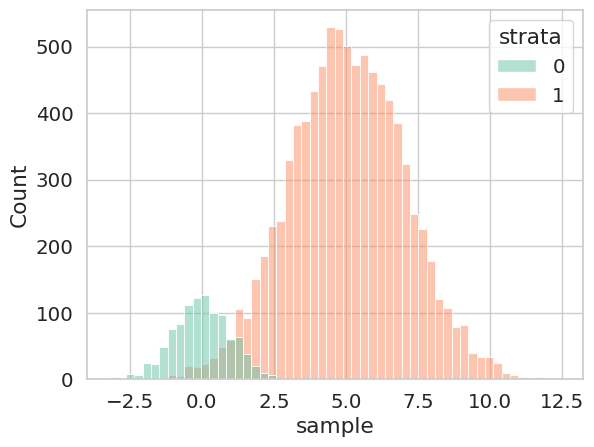

In [423]:
# перекос 1:9
data = generate_data(10_000,p=0.9)
sns.histplot(data,x='sample',hue='strata')

In [480]:
from functools import partial
# зафиксируем перекос p=1/10

def estimate_means(p,data_size=1000):
    data_size = 1_000

    data = generate_data(data_size,p=0.5)

    # стратифицированное среднее отличается от обычного явно заданными весами страт

    # веса страт
    weights = data['strata'].value_counts(normalize=True).values

    calc_strat_mean = partial(weighted_mean, weights=weights)

    # среднее в стратах
    strat_means = []
    means = []

    for i in tqdm(range(2000)):
        sample1, sample2 =  weighted_sampler(data,sample_size=100,strata_weights=[1-p,p])
        means.append(sample1['sample'].mean()-sample2['sample'].mean())
        strat_means.append(calc_strat_mean(sample1) - calc_strat_mean(sample2))

    return np.array(strat_means), np.array(means)

100%|██████████| 2000/2000 [00:11<00:00, 175.19it/s]


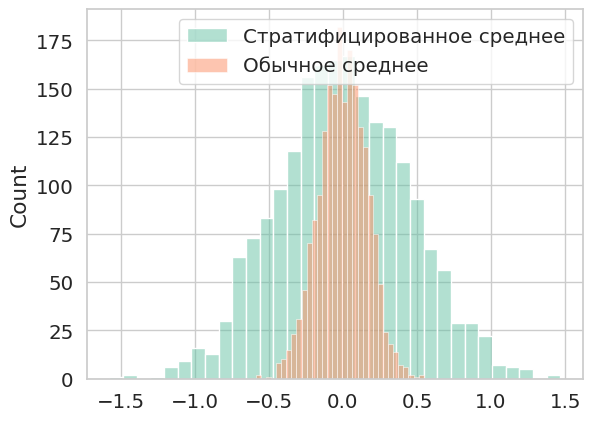

In [481]:
strat_means,means = estimate_means(p=0.1,data_size=1000)
sns.histplot(strat_means,label='Стратифицированное среднее',alpha=0.5)
sns.histplot(means,label='Обычное среднее',alpha=0.5)
plt.legend()
pass

100%|██████████| 2000/2000 [00:08<00:00, 225.39it/s]


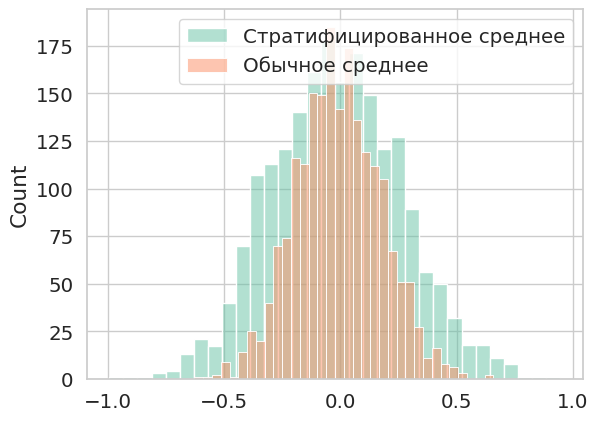

In [482]:
strat_means,means = estimate_means(p=0.25,data_size=1000)
sns.histplot(strat_means,label='Стратифицированное среднее',alpha=0.5)
sns.histplot(means,label='Обычное среднее',alpha=0.5)
plt.legend()
pass

100%|██████████| 2000/2000 [00:07<00:00, 254.03it/s]


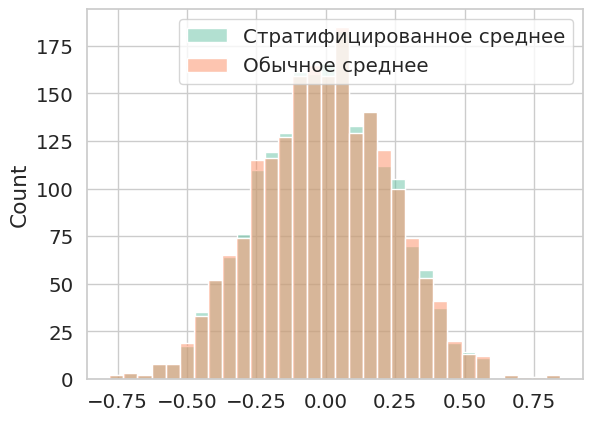

In [483]:
strat_means,means = estimate_means(p=0.5,data_size=1000)
sns.histplot(strat_means,label='Стратифицированное среднее',alpha=0.5)
sns.histplot(means,label='Обычное среднее',alpha=0.5)
plt.legend()
pass

100%|██████████| 2000/2000 [00:08<00:00, 225.93it/s]


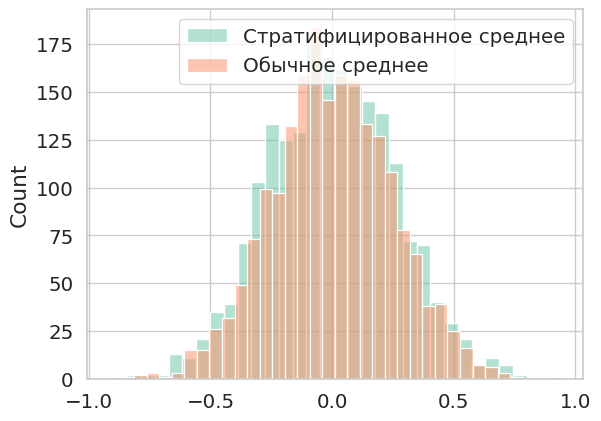

In [484]:
strat_means,means = estimate_means(p=0.9,data_size=1000)
sns.histplot(strat_means,label='Стратифицированное среднее',alpha=0.5)
sns.histplot(means,label='Обычное среднее',alpha=0.5)
plt.legend()
pass

100%|██████████| 2000/2000 [00:12<00:00, 162.98it/s]


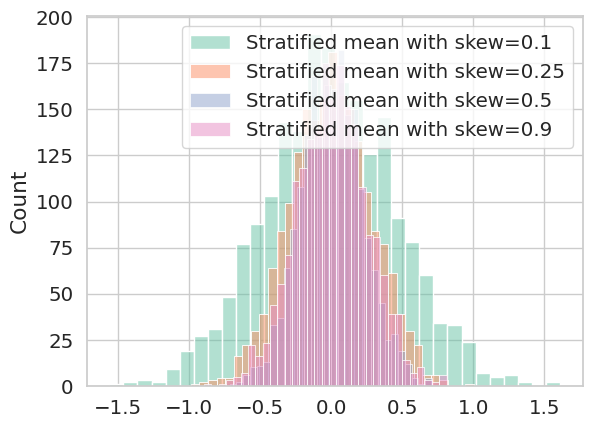

In [488]:
strat_means = [estimate_means(p=p,data_size=1000)[0] for p in [0.1,0.25,0.5,0.9]]
[sns.histplot(means,label=f'Stratified mean with {skew=}',alpha=0.5) for means,skew in zip(strat_means,[0.1,0.25,0.5,0.9])]
plt.legend()

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

При взвешенном сэмплировании мы изменяем пропорцию между стратами относительно генеральной совокупности. Но при оценки среднего и дисперсии групп сэмплов подставляем веса как в генеральной совокупности. Из-за этого вносим ошибку дисперсии


Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

Переформулируем задачу не на то, как посчитать среднее, а взвешенную статистику с заданными генеральной совокупностью весами по стратам

- $w_i$ - априорные веса заданные генеральной совокупностью
- $\mu_i$ - среднее по сэмплируемым стратам  

$$
    S = \sum\limits_{i=1}^n w_i \mu_i
$$

Оценку дисперсии можно выполнить с помощью бутстрэпа


Реализуйте эту процедруру.

In [521]:
from scipy.stats import bootstrap
def bootstrap_strat_test(sample1,sample2,calc_strat_mean,B=100):

    diff_mean = calc_strat_mean(sample1) - calc_strat_mean(sample2)

    calc_var = lambda x: np.var([calc_strat_mean(x.sample(n=len(x),replace=True)) for _ in range(B)])

    var =  calc_var(sample1) + calc_var(sample2)

    t = diff_mean / np.sqrt(var)
    return 2 * sps.norm.sf(np.abs(t))


Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.

In [532]:
data = generate_data(500,p=0.5)
weights = data['strata'].value_counts(normalize=True).values
calc_strat_mean = partial(weighted_mean, weights=weights)

p = 0.1
p_values = []

for i in tqdm(range(2000)):
    sample1, sample_2 = weighted_sampler(data,sample_size=100,strata_weights=[1-p,p])
    p_values.append(
        bootstrap_strat_test(sample1,sample_2,calc_strat_mean)
    )

100%|██████████| 2000/2000 [08:54<00:00,  3.74it/s]


In [537]:
proportion_confint((np.array(p_values) < 0.05).sum(), 2000, method='wilson')

(0.053166899529154835, 0.07450859979466022)

Тест исправен